In [1]:
%matplotlib inline   
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
LARGE_FIG_SIZE=(15, 15)

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")

In [2]:
import sys
sys.path.append('../')
from utils import utils

In [3]:
titanic = pd.read_csv('train.csv')
titanic_non_null = titanic.dropna(subset=['Embarked'])
titanic_ft = titanic_non_null.drop('Survived', 1)

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer

In [5]:
drop_attr = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch']
num_attr = ['Pclass', 'Age', 'Fare'] #2
cat_ordinal_attr = ['Sex'] #1



cat_pipeline = ColumnTransformer([
    ('cat_ordinal', OrdinalEncoder(), cat_ordinal_attr),
    ('drop_cols', 'drop', drop_attr)
], remainder='passthrough')

pipeline = Pipeline([
    ('cat_pipeline', cat_pipeline),
    ('imputer', KNNImputer())
])


prepared_columns = cat_ordinal_attr \
    + num_attr


In [276]:
X = pipeline.fit_transform(titanic_ft)
df = pd.DataFrame(X, columns=prepared_columns)
df['Survived'] = titanic_non_null['Survived'].values
df['Embarked'] = titanic_non_null['Embarked'].values
df['fam_zise'] = titanic_non_null['SibSp'].values + titanic_non_null['Parch'].values + 1

In [7]:
df

,Sex,Pclass,Age,Fare,Survived
0,1.0,3.0,22.0,7.2500,0
1,0.0,1.0,38.0,71.2833,1
2,0.0,3.0,26.0,7.9250,1
3,0.0,1.0,35.0,53.1000,1
4,1.0,3.0,35.0,8.0500,0
...,...,...,...,...,...
884,1.0,2.0,27.0,13.0000,0
885,0.0,1.0,19.0,30.0000,1
886,0.0,3.0,29.2,23.4500,0
887,1.0,1.0,26.0,30.0000,1


In [25]:
s=OrdinalEncoder()
s.fit_transform(titanic_non_null[['Sex']])
s.categories_

[array(['female', 'male'], dtype=object)]

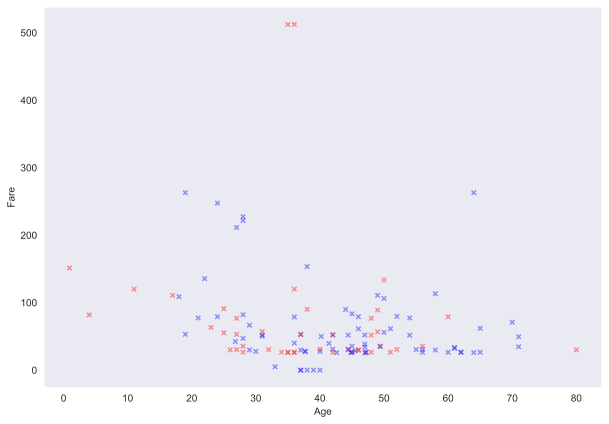

In [268]:
mkr_dict = {
    0: 'o', #femaile
    1: 'x'  #male
}

# red - survived
# blue - did not survive

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df[(df['Sex'] == kind) & (df['Pclass']==1)]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        marker = mkr_dict[kind],
        c='Survived',
        cmap=plt.get_cmap('bwr'),
        colorbar=False,
        figsize=(10,7),
        ax=axis
    )

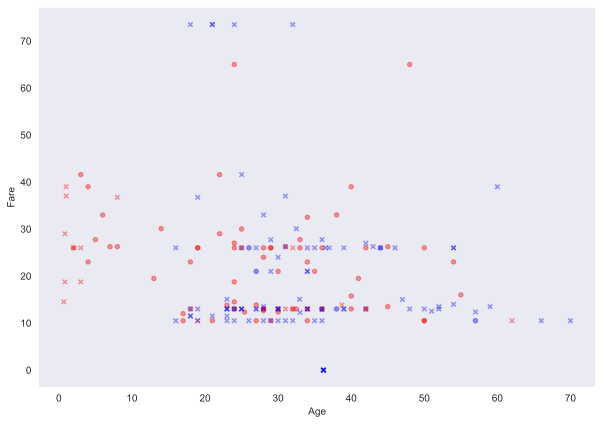

In [27]:
mkr_dict = {
    0: 'o',
    1: 'x'
}

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df[(df['Sex'] == kind) & (df['Pclass']==2)]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        marker = mkr_dict[kind],
        c='Survived',
        cmap=plt.get_cmap('bwr'),
        colorbar=False,
        figsize=(10,7),
        ax=axis
    )

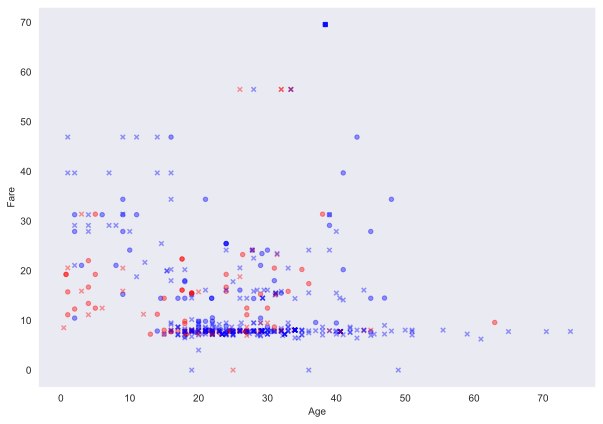

In [28]:
mkr_dict = {
    0: 'o',
    1: 'x'
}

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df[(df['Sex'] == kind) & (df['Pclass']==3)]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        marker = mkr_dict[kind],
        c='Survived',
        cmap=plt.get_cmap('bwr'),
        colorbar=False,
        figsize=(10,7),
        ax=axis
    )

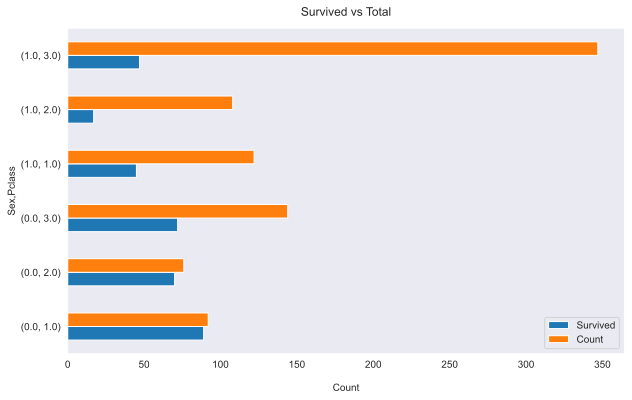

In [29]:
df['Count'] = 1
grp_sex_class = df.groupby(by=['Sex', 'Pclass']).sum()[['Survived', 'Count']]
ax = grp_sex_class.plot(kind='barh', figsize=(10,6))
plt.xlabel("Count", labelpad=14)
plt.title("Survived vs Total", y=1.02);

In [30]:
100*grp_sex_class['Survived']/grp_sex_class['Count']

Sex  Pclass
0.0  1.0       96.739130
     2.0       92.105263
     3.0       50.000000
1.0  1.0       36.885246
     2.0       15.740741
     3.0       13.544669
dtype: float64

In [31]:
grp_by_sex=df.groupby(by=['Sex']).sum()[['Survived', 'Count']]
100*grp_by_sex['Survived']/grp_by_sex['Count']

Sex
0.0    74.038462
1.0    18.890815
dtype: float64

<AxesSubplot:>

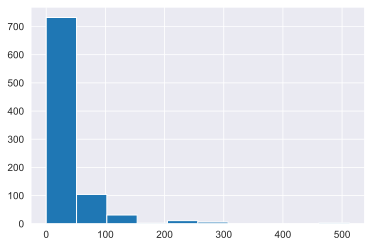

In [32]:
df['Fare'].hist(bins=10)

# Test Set

In [297]:
titanic_test = pd.read_csv('test.csv')
X_test = pipeline.fit_transform(titanic_test)
df_test = pd.DataFrame(X_test, columns=prepared_columns)

In [323]:
418/889

0.4701912260967379

In [321]:
fem_class_1_2 = titanic_test[(titanic_test['Sex']=='female')&(titanic_test['Pclass']<3)].shape[0]
fem_class_3 = titanic_test[(titanic_test['Sex']=='female')&(titanic_test['Pclass']==3)].shape[0]
male_class_2_3 = titanic_test[(titanic_test['Sex']=='male')&(titanic_test['Pclass']>2)].shape[0]
male_class_1 = titanic_test[(titanic_test['Sex']=='male')&(titanic_test['Pclass']==1)].shape[0]

fem_class_1_2, male_class_2_3, fem_class_3, male_class_1

(80, 146, 72, 57)

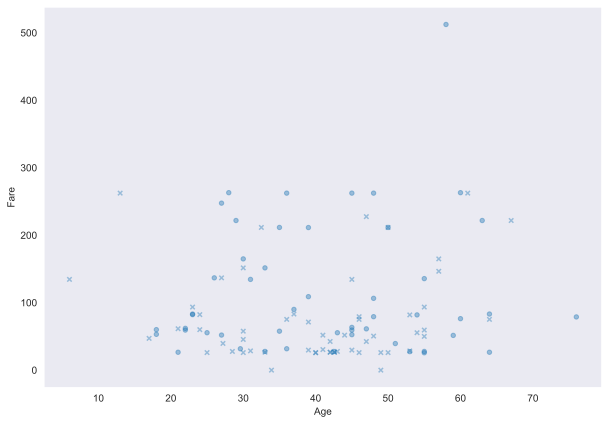

In [41]:
mkr_dict = {
    0: 'o',
    1: 'x'
}

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df_test[(df_test['Sex'] == kind) & (df_test['Pclass']==1)]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        marker = mkr_dict[kind],
        figsize=(10,7),
        ax=axis
    )

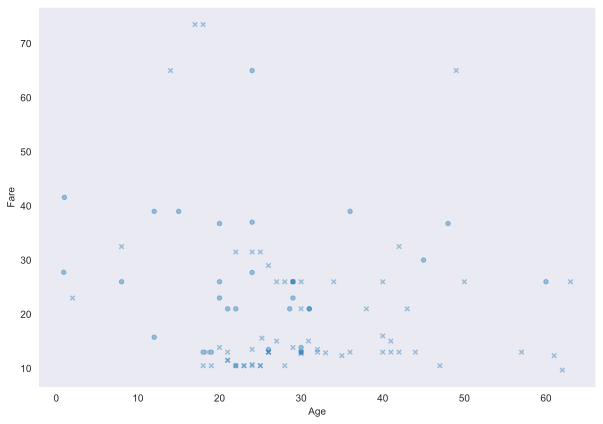

In [42]:
mkr_dict = {
    0: 'o',
    1: 'x'
}

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df_test[(df_test['Sex'] == kind) & (df_test['Pclass']==2)]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        marker = mkr_dict[kind],
        figsize=(10,7),
        ax=axis
    )

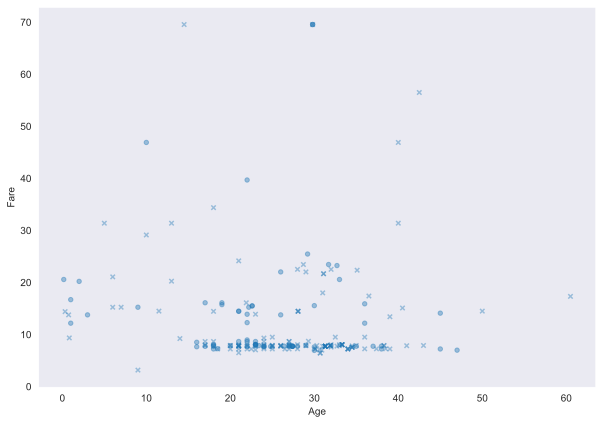

In [43]:
mkr_dict = {
    0: 'o',
    1: 'x'
}

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df_test[(df_test['Sex'] == kind) & (df_test['Pclass']==3)]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        marker = mkr_dict[kind],
        figsize=(10,7),
        ax=axis
    )

In [49]:
df.describe()

,Sex,Pclass,Age,Fare,Survived,Count
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.0
mean,0.649044,2.311586,29.882009,32.096681,0.382452,1.0
std,0.477538,0.834700,13.429478,49.697504,0.486260,0.0
min,0.000000,1.000000,0.420000,0.000000,0.000000,1.0
25%,0.000000,2.000000,21.584000,7.895800,0.000000,1.0
50%,1.000000,3.000000,29.000000,14.454200,0.000000,1.0
75%,1.000000,3.000000,38.000000,31.000000,1.000000,1.0
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.0


In [45]:
df_test.describe()

,Sex,Pclass,Age,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,0.636364,2.265550,30.413871,35.583413
std,0.481622,0.841838,12.845447,55.847672
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,22.050000,7.895800
50%,1.000000,3.000000,29.000000,14.454200
75%,1.000000,3.000000,36.875000,31.471875
max,1.000000,3.000000,76.000000,512.329200


In [ ]:
https://www.kaggle.com/mauzey/titanic-survival-prediction-using-random-forests

In [200]:
fam_names = [n.split(',')[0].split(' ')[0].strip() for n in titanic['Name'].values]
titles =    [n.split(',')[1].split('.')[0].strip() for n in titanic['Name'].values]

titanic['fam_name'] = fam_names
titanic['title'] = titles
dft = titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)


In [205]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

dft['Age'] = imputer.fit_transform(titanic[['Age','Pclass','Fare']].values)[:,0]
dft['famsize'] = dft['SibSp'] + dft['Parch']+1
dft['count']=1
dft['alone'] = (dft['famsize']==1).values.astype(np.int64)

def survived_percent(df):
    return df['Survived'].sum() / df['count'].sum()

In [250]:
survived = dft.groupby('fam_name').aggregate('sum')['Survived']

surived_in_family = []

for fn in dft['fam_name']:
    surived_in_family.append(survived.loc[fn])
    
dft['fam_survived'] = surived_in_family

In [256]:
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_name,title,famsize,count,alone,fam_survived
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,2,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,2,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Miss,1,1,1,1
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,2,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Montvila,Rev,1,1,1,0
887,1,1,female,19.0,0,0,30.0000,S,Graham,Miss,1,1,1,2
888,0,3,female,27.8,1,2,23.4500,S,Johnston,Miss,4,1,0,0
889,1,1,male,26.0,0,0,30.0000,C,Behr,Mr,1,1,1,1


In [251]:
married_fem_class_3 = dft[(dft['title']=='Mrs')&(dft['Pclass']==3)].shape[0]
married_fem_class_3_survived = dft[(dft['title']=='Mrs')&(dft['Pclass']==3)& (dft['Survived']==1)].shape[0]
fem_class_3 = dft[(dft['Sex']=='female')&(dft['Pclass']==3)].shape[0]
fem_class_3_survived = dft[(dft['Sex']=='female')&(dft['Pclass']==3) & (dft['Survived']==1)].shape[0]

print(married_fem_class_3, married_fem_class_3_survived, fem_class_3, fem_class_3_survived)

married_fem_class_3_survived/married_fem_class_3, fem_class_3_survived/fem_class_3

42 21 144 72


(0.5, 0.5)

In [260]:
dft[(dft['Sex']=='male')&(dft['Pclass']==1)&(dft['famsize']>=3)]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_name,title,famsize,count,alone,fam_survived
27,0,1,male,19.00,3,2,263.0000,S,Fortune,Mr,6,1,0,2
245,0,1,male,44.00,2,0,90.0000,Q,Minahan,Dr,3,1,0,1
248,1,1,male,37.00,1,1,52.5542,S,Beckwith,Mr,3,1,0,2
262,0,1,male,52.00,1,1,79.6500,S,Taussig,Mr,3,1,0,2
305,1,1,male,0.92,1,2,151.5500,S,Allison,Master,4,1,0,1
377,0,1,male,27.00,0,2,211.5000,C,Widener,Mr,3,1,0,0
390,1,1,male,36.00,1,2,120.0000,S,Carter,Mr,4,1,0,4
438,0,1,male,64.00,1,4,263.0000,S,Fortune,Mr,6,1,0,2
445,1,1,male,4.00,0,2,81.8583,S,Dodge,Master,3,1,0,1
550,1,1,male,17.00,0,2,110.8833,C,Thayer,Mr,3,1,0,2


<AxesSubplot:ylabel='Sex,Pclass,alone'>

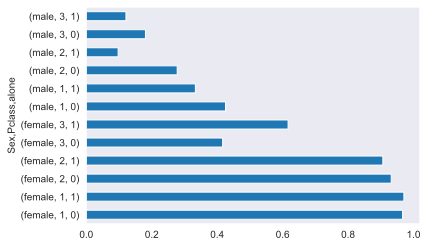

In [206]:
survived_percent(dft.groupby(['Sex', 'Pclass', 'alone'])).plot(kind='barh')

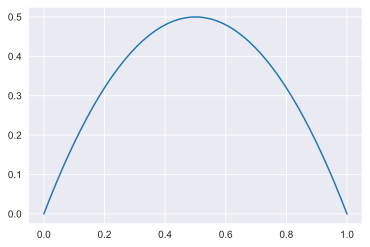

In [100]:
def impurity(x):
    return 1-np.sum((np.array(x)/np.sum(x))**2)

x=np.linspace(0,1)
plt.plot(x,[impurity([p, 1-p]) for p in x])
plt.grid()

In [114]:
def impurity_decrease(N, N_t, impurity, N_t_R, right_impurity, N_t_L, left_impurity):
    return N_t / N * (impurity - (N_t_R / N_t) * right_impurity - (N_t_L / N_t) * left_impurity)
    
impurity_decrease(20, 20, impurity([0.4, 0.6]), 5, impurity([0.2,0.8]), 15, impurity([0.3,0.7]))

0.08499999999999996

<AxesSubplot:ylabel='Embarked'>

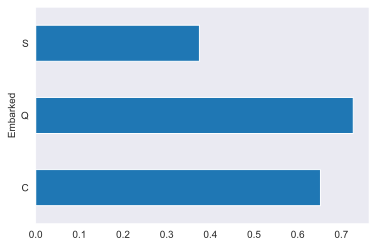

In [267]:
survived_percent(dft[(dft['Sex']=='female') & (dft['Pclass']==3)].groupby('Embarked')).plot(kind='barh')

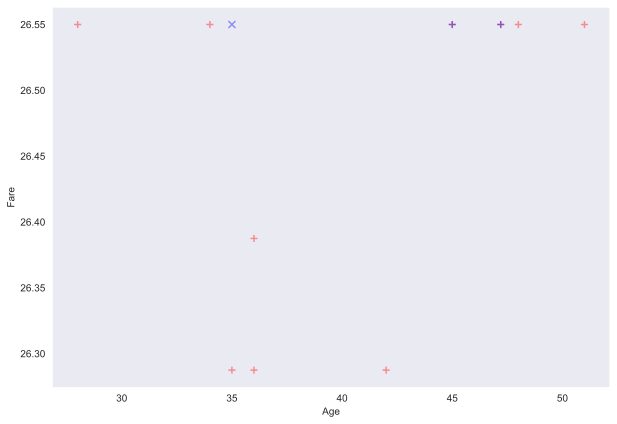

In [357]:
mkr_dict = {
    'Q': 'o',
    'C': 'x',
    'S': '+'
}

# red - survived
# blue - did not survive

fig, axis = plt.subplots(1,1)

for kind in mkr_dict:
    d = df[(df['Embarked'] == kind) & (df['Pclass']==1) & (df['Sex']==1) & (df['Fare']<27.135) & (df['Age']<53) &(df['Fare']>26.144) ]
    d.plot(
        kind = 'scatter',
        x='Age',
        y='Fare',
        alpha=0.4,
        s = d['fam_zise']*50,
        marker = mkr_dict[kind],
        c='Survived',
        cmap=plt.get_cmap('bwr'),
        colorbar=False,
        figsize=(10,7),
        ax=axis
    )

In [330]:
titanic_test.groupby(by=['Sex']).count()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,152,152,152,127,152,152,152,152,44,152
male,266,266,266,205,266,266,266,265,47,266


In [354]:
titanic.groupby(by=['Sex', 'Pclass']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Pclass                                                                 
female 1                94        94    94   85     94     94      94    94   
       2                76        76    76   74     76     76      76    76   
       3               144       144   144  102    144    144     144   144   
male   1               122       122   122  101    122    122     122   122   
       2               108       108   108   99    108    108     108   108   
       3               347       347   347  253    347    347     347   347   

               Cabin  Embarked  fam_name  title  
Sex    Pclass                                    
female 1          81        92        94     94  
       2          10        76        76     76  
       3           6       144       144    144  
male   1          95       122       122    122  
       2           6       108       108    108  
       3           6       347       347    347

In [332]:
titanic_test.groupby(by=['Sex', 'Pclass']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex    Pclass                                                              
female 1                50    50   48     50     50      50    50     40   
       2                30    30   29     30     30      30    30      3   
       3                72    72   50     72     72      72    72      1   
male   1                57    57   50     57     57      57    57     40   
       2                63    63   59     63     63      63    63      4   
       3               146   146   96    146    146     146   145      3   

               Embarked  
Sex    Pclass            
female 1             50  
       2             30  
       3             72  
male   1             57  
       2             63  
       3            146

In [336]:
n_test = titanic_test.shape[0]

n_test, 0.766*n_test, 0.8*n_test, 50 + 30 + 63 + 146

(418, 320.188, 334.40000000000003, 289)

152 - survived

266 - perished

need to correctly classify 15 more to reach 0.80

50 + 30 + 63 + 146 = 289 - no change in predictions - same score from these examples

72 - 

57 - 

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer

drop_attr = ['PassengerId', 'Ticket', 'Cabin', 'Age']
num_attr = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'] #2
cat_ordinal_attr = ['Sex', 'Embarked'] #1

def extract_titles(series):
    return  np.array([ 'Other' if t not in ['Mr', 'Mrs', 'Miss', 'Master'] else t
        for t in [n.split(',')[1].split('.')[0].strip() for n in series.values.ravel()]
    ]).reshape(-1,1)




cat_pipeline = ColumnTransformer([
    ('cat_ordinal', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('ord', OrdinalEncoder())]), cat_ordinal_attr),
    ('title', Pipeline([('extract_titles', FunctionTransformer(extract_titles)), ('ord', OrdinalEncoder())]), ['Name']),
    ('passthrough', 'passthrough', num_attr)
])

disc_pipeline = ColumnTransformer([
    ('age', KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal'), [3]),
    ('fare', KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal'), [4])
], remainder='passthrough')


famsize_adder = ColumnTransformer([
    ('famsize_adder', FunctionTransformer(lambda X: np.array(X[:,0] + X[:,1]).reshape(-1,1)), [6,7])
], remainder='passthrough')

pipeline = Pipeline([
    ('cat_pipeline', cat_pipeline), #columns: Sex, Embarked, Name, Age, Fare, Pclass, SibSp, Parch
    ('imputer', KNNImputer()),
#     ('disc_pipeline', disc_pipeline), #columns: Age, Fare, Sex, Embarked, Name, Pclass, SibSp, Parch
    ('famsize_adder', famsize_adder), #columns: fam_size, Age, Fare, Sex, Embarked, Name, Pclass
#     ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))
])


prepared_columns = ['fam_size', 'Sex', 'Embarked', 'Title', 'Age', 'Fare', 'Pclass']

from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('cat_pipeline',
                 ColumnTransformer(transformers=[('cat_ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder())]),
                                                  ['Sex', 'Embarked']),
                                                 ('title',
                                                  Pipeline(steps=[('extract_titles',
                                                                   FunctionTransformer(func=<function extract_titles at 0x12b4c9670>)),
                                                                  ('ord',
                                                                   OrdinalEncoder())]),
                                                  ['Name']),
                                                 ('passthrough', 'passthrough',
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp', 'Parch'])])),
                ('imputer', KNNImputer()),
                ('famsize_adder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('famsize_adder',
                                                  FunctionTransformer(func=<function <lambda> at 0x12d823c10>),
                                                  [6, 7])]))])

In [342]:
pd.DataFrame(pipeline.fit_transform(titanic_ft), columns=prepared_columns).describe()

,fam_size,Sex,Embarked,Title,Age,Fare,Pclass
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.906637,0.649044,1.535433,1.906637,29.817384,32.096681,2.311586
std,1.614703,0.477538,0.792088,0.797837,13.493265,49.697504,0.834700
min,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,21.100000,7.895800,2.000000
50%,0.000000,1.000000,2.000000,2.000000,29.000000,14.454200,3.000000
75%,1.000000,1.000000,2.000000,2.000000,37.600000,31.000000,3.000000
max,10.000000,1.000000,2.000000,4.000000,80.000000,512.329200,3.000000


In [344]:
t = pd.DataFrame(pipeline.transform(titanic_test), columns=prepared_columns)
t.describe()

,fam_size,Sex,Embarked,Title,Age,Fare,Pclass
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.839713,0.636364,1.401914,1.918660,30.371574,35.560684,2.265550
std,1.519072,0.481622,0.854496,0.788458,13.248214,55.857052,0.841838
min,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,22.000000,7.895800,1.000000
50%,0.000000,1.000000,2.000000,2.000000,28.100000,14.454200,3.000000
75%,1.000000,1.000000,2.000000,2.000000,39.375000,31.471875,3.000000
max,10.000000,1.000000,2.000000,4.000000,76.000000,512.329200,3.000000


In [353]:
n_test, 0.766*n_test, 0.8*n_test, 325/n_test

(418, 320.188, 334.40000000000003, 0.777511961722488)

2 kids from male, class 1

In [359]:
t[(t['Sex']==1) & (t['Pclass']>1) & (t['Age']<=16) & (t['fam_size']<4) & (t['fam_size']>0)]

,fam_size,Sex,Embarked,Title,Age,Fare,Pclass
21,1.0,1.0,2.0,0.0,9.000,3.1708,3.0
80,2.0,1.0,0.0,0.0,6.000,15.2458,3.0
89,2.0,1.0,2.0,0.0,2.000,23.0000,2.0
161,2.0,1.0,0.0,0.0,7.000,15.2458,3.0
192,2.0,1.0,2.0,0.0,11.500,14.5000,3.0
194,2.0,1.0,2.0,0.0,8.000,32.5000,2.0
201,2.0,1.0,2.0,0.0,0.330,14.4000,3.0
244,3.0,1.0,2.0,0.0,14.400,23.4500,3.0
281,2.0,1.0,2.0,0.0,0.750,13.7750,3.0
307,1.0,1.0,2.0,0.0,0.830,9.3500,3.0
